# Breast Cancer Biopsy Classifer 
> A classifier that can determine whether a breast cancer sample is malignant or benign.The tumor is taken from the patient and metrics such as radius, texture, perimeter, area, smoothness, compactness, concavity, symmetry, and fractal dimension are recorded and will be used in the classification. 

# Factors Determining the Characteristics of the Cells
- diagnosis : Whether the tumor was diagnosed as malignant (1) or benign (0).
- perimeter _ mean : The average perimeter of cells in that particular biopsy
- radius _ mean : The average radius of cells in that particular biopsy
- texture _ mean : The average texture of cells in that particular biopsy
- area _ mean : The average area of cells in that particular biopsy
- smoothness _ mean : The average smoothness of cells in that particular biopsy
- concavity _ mean : The average concavity of cells in that particular biopsy
- symmetry _ mean : The average symmetry of cells in that particular biopsy

# Dataset Information
The dataset used  to train the model is called the Breast Cancer Wisconsin (Diagnostic) Data Set. It consists of 569 biopsy samples. 

In [4]:
import pandas as pd
from sklearn import metrics

data = pd.read_csv('files/cancer.csv')
data['diagnosis'].replace({'M':1, 'B':0}, inplace = True) # Replaces Malignant with 0 and Benign with 1, to simplify data visualization 
data.to_csv('cancer.csv')
del data

In [5]:
import os             
import numpy as np    
import pandas as pd   
from sklearn.metrics import accuracy_score

In [6]:
# Uploading and preparing data
data_path  = 'cancer.csv'

dataframe = pd.read_csv(data_path)

dataframe = dataframe[['diagnosis', 'perimeter_mean', 'radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean']]
dataframe['diagnosis_cat'] = dataframe['diagnosis'].astype('category').map({1: '1 (malignant)', 0: '0 (benign)'})

dataframe.head()

,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat
0,1,122.80,17.99,10.38,1001.0,0.11840,0.3001,0.2419,1 (malignant)
1,1,132.90,20.57,17.77,1326.0,0.08474,0.0869,0.1812,1 (malignant)
2,1,130.00,19.69,21.25,1203.0,0.10960,0.1974,0.2069,1 (malignant)
3,1,77.58,11.42,20.38,386.1,0.14250,0.2414,0.2597,1 (malignant)
4,1,135.10,20.29,14.34,1297.0,0.10030,0.1980,0.1809,1 (malignant)


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt 

,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat
0,1,122.80,17.99,10.38,1001.0,0.11840,0.3001,0.2419,1 (malignant)
1,1,132.90,20.57,17.77,1326.0,0.08474,0.0869,0.1812,1 (malignant)
2,1,130.00,19.69,21.25,1203.0,0.10960,0.1974,0.2069,1 (malignant)
3,1,77.58,11.42,20.38,386.1,0.14250,0.2414,0.2597,1 (malignant)
4,1,135.10,20.29,14.34,1297.0,0.10030,0.1980,0.1809,1 (malignant)


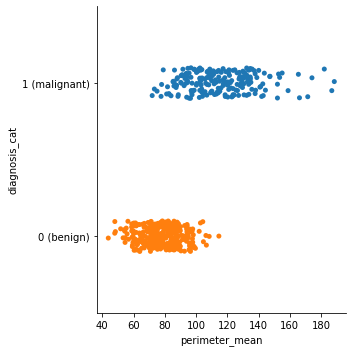

In [8]:
# Visualizing the relationship between mean perimeter and identifying Malignant vs Benign 
sns.catplot(x = 'perimeter_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])
dataframe.head()

Lower perimenter_mean seems to correlate with benign tumors. It is important to note that perimeter_mean has overlap so it is important to consider other factors 

Lower radius_mean correlates with benign tumors, similar to perimeter. 

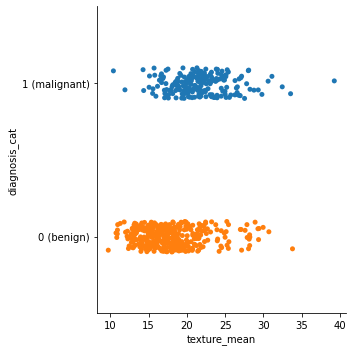

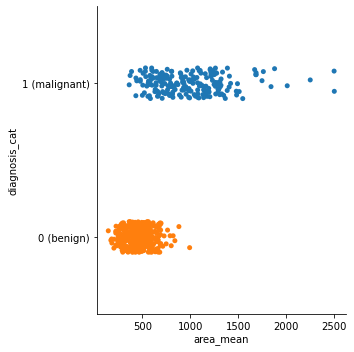

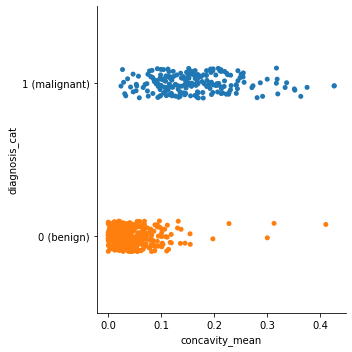

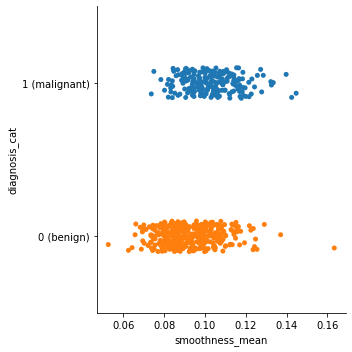

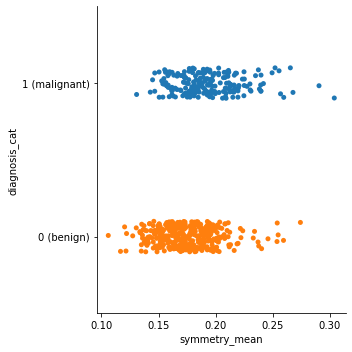

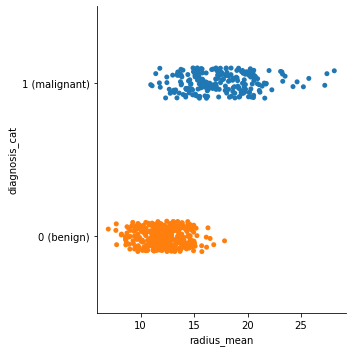

In [9]:
sns.catplot(x = 'texture_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])
sns.catplot(x = 'area_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])
sns.catplot(x = 'concavity_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])
sns.catplot(x = 'smoothness_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])
sns.catplot(x = 'symmetry_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])
sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])


Mean Radius seems to have the most accurate, strongest correlation with the diagnosis. 

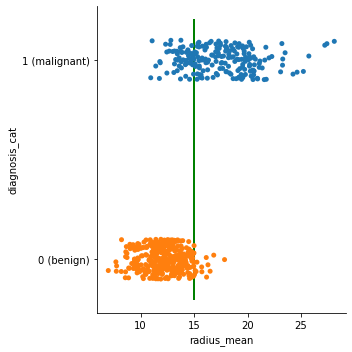

In [10]:
boundary = 15 

sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])
plt.plot([boundary, boundary], [-.2, 1.2], 'g', linewidth = 2)

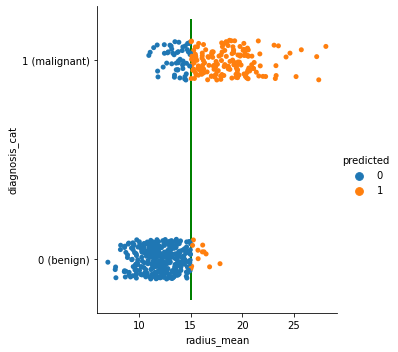

In [11]:
def boundary_classifier(target_boundary, radius_mean_series):
  result = [] #fill this in with predictions!
  # YOUR CODE HERE
  for radius in radius_mean_series:
    if radius> target_boundary:
      result.append(1)
    else:
      result.append(0)
  return result

chosen_boundary = 15

y_pred = boundary_classifier(chosen_boundary, dataframe['radius_mean'])
dataframe['predicted'] = y_pred

y_true = dataframe['diagnosis']

sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', hue = 'predicted', data = dataframe, order=['1 (malignant)', '0 (benign)'])
plt.plot([chosen_boundary, chosen_boundary], [-.2, 1.2], 'g', linewidth = 2)


In [12]:
print (list(y_true))
print (y_pred)

accuracy = accuracy_score(y_true,y_pred)
print(accuracy)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 

Accuracy will increase, as more x variables are introduced. 

In [13]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

In [14]:
print('Number of rows in training dataframe:', train_df.shape[0])
train_df.head()

Number of rows in training dataframe: 455


,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
408,1,117.80,17.99,20.66,991.7,0.10360,0.120100,0.1992,1 (malignant),1
4,1,135.10,20.29,14.34,1297.0,0.10030,0.198000,0.1809,1 (malignant),1
307,0,56.36,9.00,14.40,246.3,0.07005,0.003681,0.1788,0 (benign),0
386,0,78.78,12.21,14.09,462.0,0.08108,0.068390,0.1646,0 (benign),0
404,0,78.29,12.34,14.95,469.1,0.08682,0.021090,0.1571,0 (benign),0


In [15]:
print('Number of rows in test dataframe:', test_df.shape[0])
test_df.head()

Number of rows in test dataframe: 114


,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
421,0,98.22,14.69,13.98,656.1,0.10310,0.14500,0.2086,0 (benign),0
47,1,85.98,13.17,18.66,534.6,0.11580,0.12260,0.2128,1 (malignant),0
292,0,83.14,12.95,16.02,513.7,0.10050,0.06155,0.1730,0 (benign),0
186,1,118.60,18.31,18.58,1041.0,0.08588,0.08169,0.1621,1 (malignant),1
414,1,96.71,15.13,29.81,719.5,0.08320,0.04686,0.1852,1 (malignant),1


In [16]:
X = ['radius_mean']
y = 'diagnosis'

X_train = train_df[X]
print('X_train, our input variables:')
print(X_train.head())
print()

y_train = train_df[y]
print('y_train, our output variable:')
print(y_train.head())

X_train, our input variables:
     radius_mean
408        17.99
4          20.29
307         9.00
386        12.21
404        12.34

y_train, our output variable:
408    1
4      1
307    0
386    0
404    0
Name: diagnosis, dtype: int64


In [20]:
from sklearn import linear_model
logreg_model = linear_model.LogisticRegression()

logreg_model.fit(X_train, y_train)
X_test = test_df[X]
y_test = test_df[y]

y_pred = logreg_model.predict(X_test)

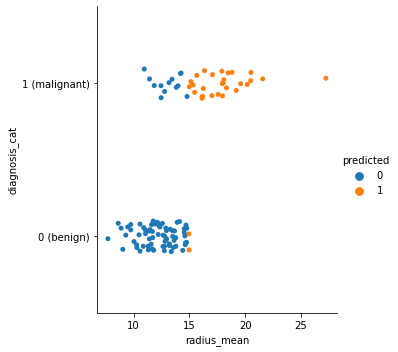

In [21]:
test_df['predicted'] = y_pred.squeeze()
sns.catplot(x = X[0], y = 'diagnosis_cat', hue = 'predicted', data=test_df, order=['1 (malignant)', '0 (benign)'])

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.868421052631579


<AxesSubplot:xlabel='radius_mean', ylabel='Predicted Probability'>

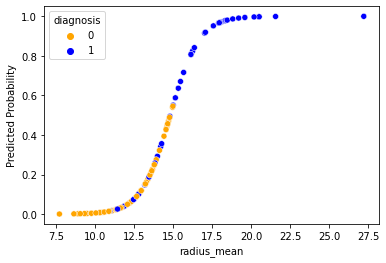

In [23]:
y_prob = logreg_model.predict_proba(X_test)
X_test_view = X_test[X].values.squeeze()
plt.xlabel('radius_mean')
plt.ylabel('Predicted Probability')
sns.scatterplot(x = X_test_view, y = y_prob[:,1], hue = y_test, palette=['orange','blue'])

The colors represent the true diagnosis, while the the y axis represents the predicted probability. 

In [24]:
multi_X = ['radius_mean', 'perimeter_mean', 'smoothness_mean']
y = 'diagnosis'

# 1. Split data into train and test
multi_train_df, multi_test_df = train_test_split(dataframe, test_size = 0.2, random_state = 5)

# 2. Prepare X_train, X_test, y_train, and y_test variables by extracting the appropriate columns:
X_test = multi_test_df[multi_X]
X_train = multi_train_df[multi_X]
y_test = multi_test_df[y]
y_train = multi_train_df[y]
# 3. Initialize the model object
logreg_model = linear_model.LogisticRegression()
# 4. Fit the model to the training data
logreg_model.fit(X_train, y_train)
# 5. Use this trained model to predict on the test data
y_pred = logreg_model.predict(X_test)
# 6. Evaluate the accuracy by comparing to to the test labels and print out accuracy.
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9122807017543859


Text(0.5, 257.44, 'Predicted diagnosis')

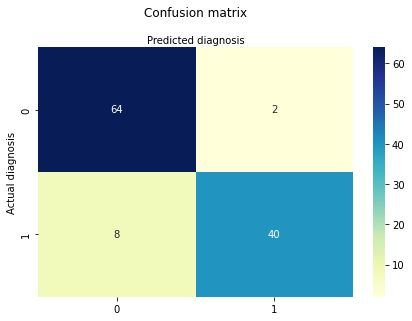

In [25]:
#@title Run this code to create a confusion matrix. { display-mode: "form" }
#@markdown If you are curious how it works you may double-click to inspect the code.

# Import the metrics class
from sklearn import metrics

# Create the Confusion Matrix
# y_test = dataframe['diagnosis']
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Visualizing the Confusion Matrix
class_names = [0,1] # Our diagnosis categories

fig, ax = plt.subplots()
# Setting up and visualizing the plot (do not worry about the code below!)
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual diagnosis')
plt.xlabel('Predicted diagnosis')

In [26]:
print(cnf_matrix)
(tn, fp), (fn, tp) = cnf_matrix
print ("True-Negative, False-Positive, False-Negative, True-Positive:", tn, fp, fn, tp)

[[64  2]
 [ 8 40]]
True-Negative, False-Positive, False-Negative, True-Positive: 64 2 8 40
